#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Download the National dataset from here : https://www.ssa.gov/oact/babynames/limits.html
It has series of files like 'yob1880.txt'  upto 2018.
These file contain names with atleast 5 occurences in each year.

In [2]:
names1880 = pd.read_csv('names/yob1880.txt', names=['Name', 'Sex', 'Births'])

In [3]:
names1880.head()

,Name,Sex,Births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


#### Since the dataset split into files by year, So the 1st thing to assemble all of data into single dataframe using stringformatter and further add year field. Using pandas -> concat function.

In [4]:
years = range(1880,2019)

pieces = []

for year in years:
    path = 'names/yob{}.txt'.format(year)
    frame = pd.read_csv(path, names=['Name', 'Sex', 'Births'])
    frame['Year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)

In [5]:
names.tail()

,Name,Sex,Births,Year
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018
1957045,Zzyzx,M,5,2018


In [6]:
# Now we can aggregate the data using pivot_table or groupby() , gives Totla no. of Male and Female i particular year.

total_births = names.pivot_table('Births', index='Year', columns='Sex', aggfunc=sum)
total_births.head()

Sex,F,M
Year,,
1880,90994,110490
1881,91953,100743
1882,107847,113686
1883,112319,104625
1884,129019,114442


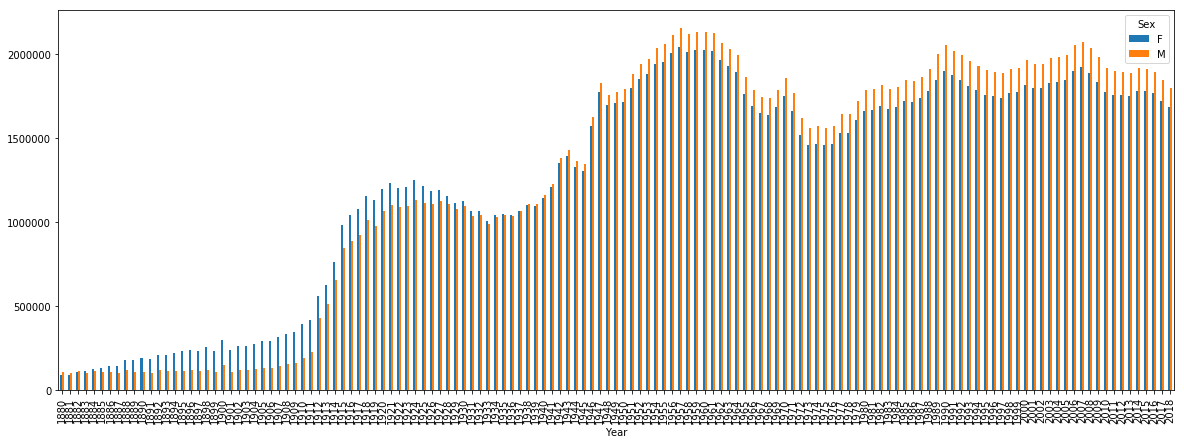

In [71]:
total_births.plot.bar(figsize=(20,7))

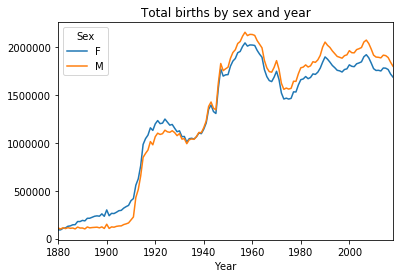

In [94]:
total_births.plot(title='Total births by sex and year')

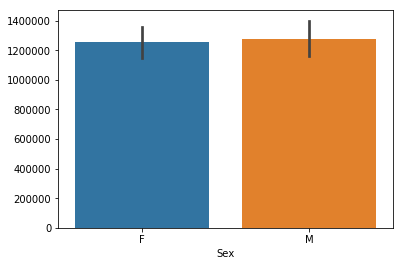

In [175]:
sns.barplot(data=total_births)

In [87]:
all_names_index = names.set_index(['Sex', 'Name', 'Year']).sort_index()
all_names_index.head()

Births
Sex Name  Year        
F   Aabha 2011       7
          2012       5
          2014       9
          2015       7
          2016       7

In [40]:
# Now insert a new column 'prop' with the fraction of babies given each name relative to the total number of births.
# So we group the data by 'year' and 'sex' then add the new column to each group

def add_prop(group):
    Births = group.Births.astype(float)
    group['prop'] = Births / Births.sum()      # To compute the fraction using float
    return group

names = names.groupby(['Year','Sex']).apply(add_prop)

In [41]:
names.head()

,Name,Sex,Births,Year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [42]:
# Since this is floating point data, use : np.allclose() , to check the group sums are close to 1

np.allclose(names.groupby(['Year','Sex']).prop.sum(), 1)

True

In [54]:
# Now we are extracting top 1000 names of each sex/year to facilitate further analysis

def get_top1000(group):
    return group.sort_values(by='Births', ascending=False)[:1000]             # using : group.sort_values  <- group.sort_index

grouped = names.groupby(['Year','Sex'])
top1000 = grouped.apply(get_top1000)

top1000.head()                   

Name Sex  Births  Year      prop
Year Sex                                         
1880 F   0       Mary   F    7065  1880  0.077642
         1       Anna   F    2604  1880  0.028617
         2       Emma   F    2003  1880  0.022012
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [55]:
# Use above method or this method both are same

# pieces = []                                                               
# for year, group in names.groupby(['Year','Sex']):
#     pieces.append(group.sort_values(by='Births', ascending=False)[:1000])

# top1000 = pd.concat(pieces, ignore_index=True)
# top1000.head()

### Analyzing Naming trends

In [61]:
boys = top1000[top1000.Sex == 'M']                      # Splitting the top 1000 names into boys and girls portion
girls = top1000[top1000.Sex == 'F']
# boys

In [72]:
# Now lets form a pivot table of total number of births by name and year

total_births = top1000.pivot_table('Births', columns='Name', aggfunc=sum)

In [73]:
total_births

Name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,...,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire
Births,4154,575,87017,266,4897,582701,438,6,3265,6,...,124460,82460,8867,5213,83,3311,4848,3653,5816,871


In [74]:
def name_plot(Sex, Name):
    data = all_names_index.loc[Sex, Name]
    plt.plot(data.index, data.values)

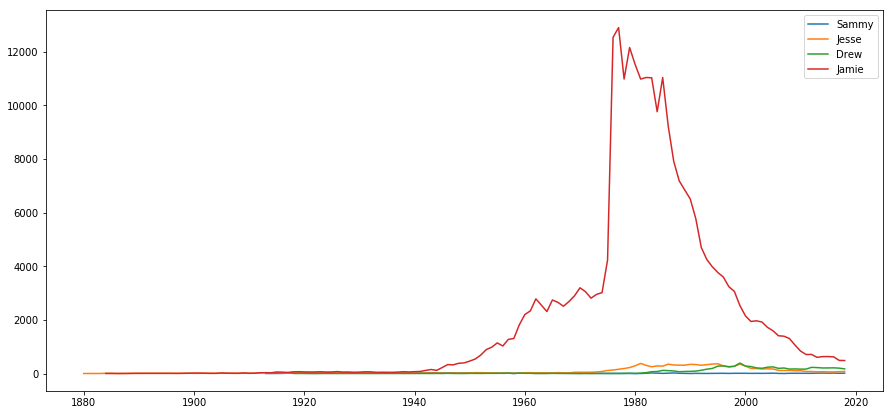

In [77]:
plt.figure(figsize=(15,7))

names=['Sammy', 'Jesse', 'Drew', 'Jamie']
for name in names:
    name_plot('F', name)
plt.legend(names)

#### While each of the names has been slowly gaining popularity as female names, the name 'Jamie' was overwhelmingly popular as a 'female' name in the years around 1980.

#### Let’s plot the same names but this time as 'Male' names:

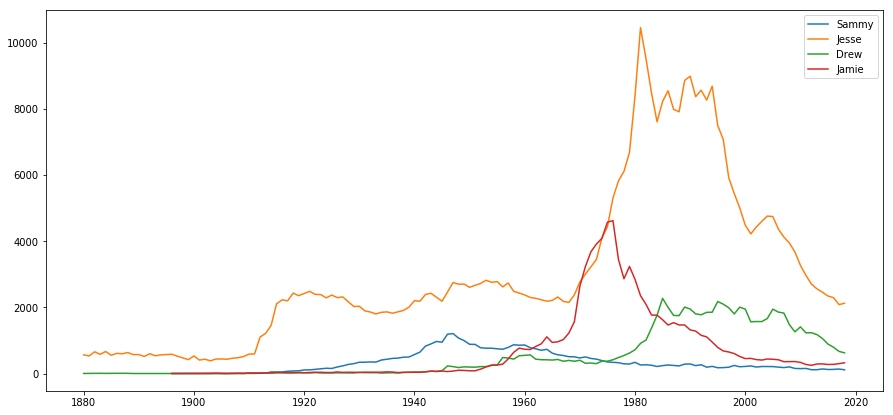

In [78]:
plt.figure(figsize=(15,7))

names=['Sammy', 'Jesse', 'Drew', 'Jamie']
for name in names:
    name_plot('M', name)                     # as 'Male' names
plt.legend(names)

#### Now in case  of Male : the name 'Jesse' was getting popular in the year around 1980.